In [1]:
#%matplotlib notebook
import numpy as np
import trimesh
from trimesh.exchange.binvox import voxelize_mesh
from tqdm import tqdm
import matplotlib.pyplot as plt
import pkg_resources

In [2]:
mesh = trimesh.load_mesh(pkg_resources.resource_filename("quadrotor_project", "assets/drone_parcours.obj"))

In [3]:
angel_voxel = mesh.voxelized(0.05)

In [4]:
angel_voxel.points

TrackedArray([[-0.5 ,  5.1 ,  1.  ],
              [-0.45,  5.1 ,  1.  ],
              [-0.4 ,  5.1 ,  1.  ],
              ...,
              [ 2.  ,  5.1 ,  1.  ],
              [ 2.05,  5.1 ,  1.  ],
              [ 2.1 ,  5.1 ,  1.  ]])

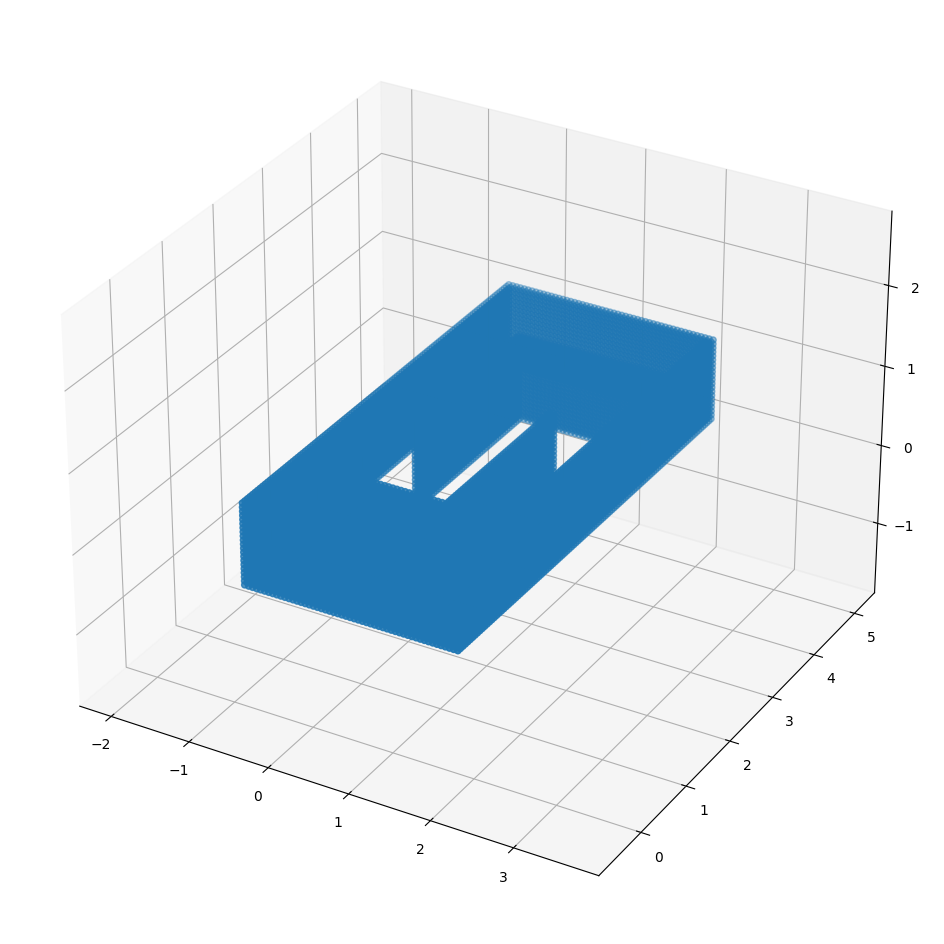

In [5]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(angel_voxel.points[:, 0], angel_voxel.points[:, 1],angel_voxel.points[:, 2])
ax.set_aspect('equal')
plt.show()

In [6]:
points = np.array(angel_voxel.points)
points.shape


(20412, 3)

In [7]:
xmin = min(angel_voxel.points[:, 0])
ymin = min(angel_voxel.points[:, 1])
zmin = min(angel_voxel.points[:, 2])

In [8]:
points[:, 0] -=xmin 
points[:, 1] -=ymin
points[:, 2] -=zmin

In [9]:
grid = np.zeros(shape=(len(np.unique(points[:,0])),len(np.unique(points[:,1])) , len(np.unique(points[:,2]))))
grid.shape

points_max = points.max(axis = 0)
points_scaled = points/points_max*(np.asarray(grid.shape)-1)

print(points.shape)

2.6
5.6000000000000005
1.0
(20412, 3)


In [15]:
for x,y,z in points_scaled:
    grid[round(x), round(y), round(z)] = 1
print(grid.shape)

(53, 113, 21)


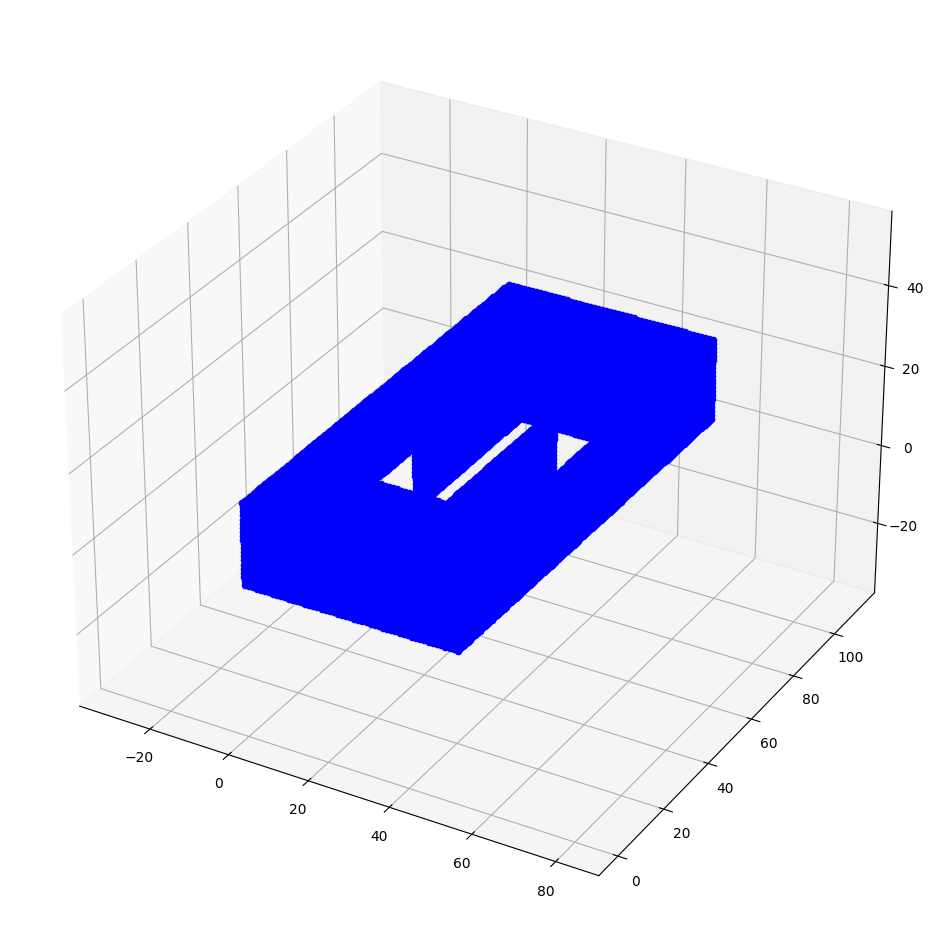

In [11]:
# Testing occupancy map
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for x in range(grid.shape[0]):
    for y in range(grid.shape[1]):
        for z in range(grid.shape[2]):
            if grid[x, y, z] == 1:
                ax.scatter(x, y, z, c='b')
ax.set_aspect('equal')
plt.show()

In [12]:
grid2D = grid[: , : , 0]

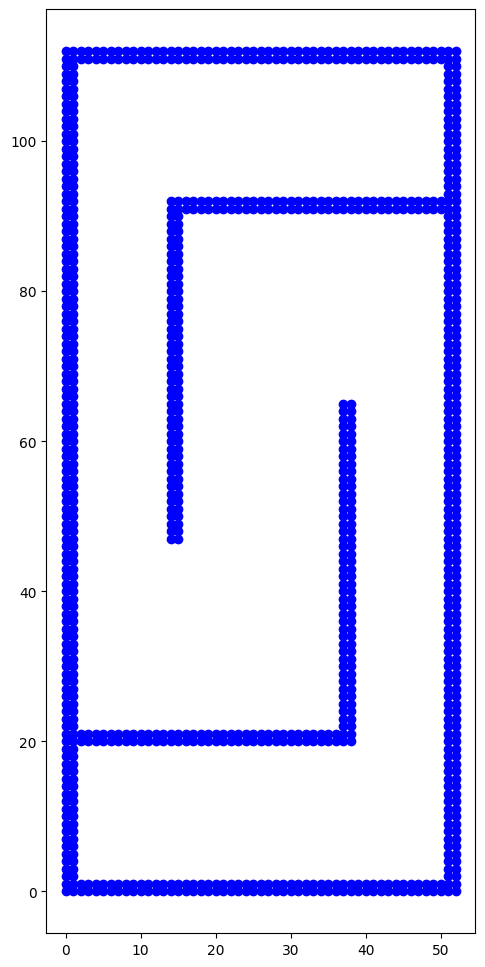

In [13]:
# Testing 2D occupancy map
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()

for x in range(grid2D.shape[0]):
    for y in range(grid2D.shape[1]):
            if grid2D[x, y] == 1:
                ax.scatter(x, y, c='b')
ax.set_aspect('equal')
plt.show()

In [14]:
#np.save('occupancygrid.npy', grid)